In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dt=pd.read_csv("C:\\ExcelR\\Assignments\\Assignment 4\\delivery_time.csv")

In [3]:
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
dt.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},inplace=True)

Correlation 

In [8]:
dt.corr()

,delivary_time,sorting_time
delivary_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\shreeram kulkarni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivary_time', ylabel='Density'>

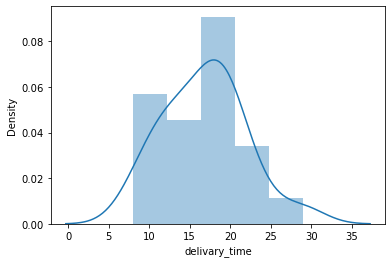

In [11]:
sns.distplot(dt['delivary_time'])

C:\Users\shreeram kulkarni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

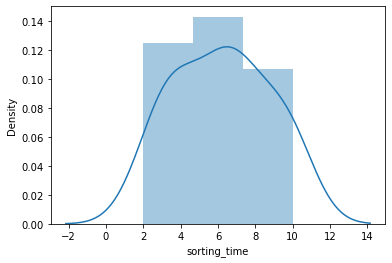

In [12]:
sns.distplot(dt['sorting_time'])

Model Building

In [13]:
model=smf.ols("delivary_time~sorting_time",data=dt).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivary_time'>

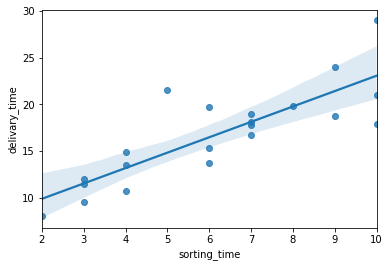

In [14]:
sns.regplot(x="sorting_time", y="delivary_time", data=dt)

In [16]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [19]:
print("Model is Delivary Time (y) = 3.823 + 6.387[Sorting Time(x)] ")

Model is Delivary Time (y) = 3.823 + 6.387[Sorting Time(x)] 


Predicting for new points

In [20]:
newdata=pd.Series([1,9,4,5])
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [21]:
model.predict(data_pred)

0     8.231754
1    21.423913
2    13.178814
3    14.827833
dtype: float64